In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.metrics import confusion_matrix ,accuracy_score ,classification_report 

In [169]:
df = pd.read_csv("orders.csv")

In [170]:
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [171]:
print(df.shape)
print(df['customer_id'].nunique())

(13471, 5)
8814


### A) Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.

In [172]:
#grouping customers with keeping the most recent order date
df_1 = df.groupby(['customer_id','gender'], sort=False)['date'].max()
df_1 = df_1.to_frame().reset_index()
df_1.columns = ['customer_id','gender','most_recent_order_date']

In [174]:
#calculating the total number of orders placed by every customer 
No_of_orders_by_customer = df['customer_id'].value_counts()
No_of_orders_by_customer = No_of_orders_by_customer.to_frame().reset_index()

In [175]:
No_of_orders_by_customer.columns = ['customer_id','order_count']
#No_of_orders_by_customer.head()

,customer_id,order_count
0,7419,25
1,4745,16
2,1668,16
3,6496,16
4,6750,14


In [176]:
cust_df = df_1.set_index('customer_id').join(No_of_orders_by_customer.set_index('customer_id'))
print(cust_df.head(10))

             gender most_recent_order_date  order_count
customer_id                                            
1000              0    2017-01-01 00:11:31            1
1001              0    2017-01-01 00:29:56            1
1002              1    2017-02-19 21:35:31            3
1003              1    2017-04-26 02:37:20            4
1004              0    2017-01-01 03:11:54            1
1005              1    2017-12-16 01:39:27            2
1006              1    2017-05-09 15:27:20            3
1007              0    2017-01-01 15:59:50            1
1008              0    2017-12-17 05:47:48            3
1009              1    2017-01-01 19:27:17            1


### B) Plot the count of orders per week for the store.

In [178]:
#converting object(date) into datetime
df2 = df
df2['date'] = pd.to_datetime(df['date'])
#splitting date
df2['Year_Week_Number'] = df2.date.dt.strftime('%Y-%U')

In [181]:
Orders_every_week = df2.groupby(['Year_Week_Number'])['value'].count()
#renaming columns
Orders_every_week.columns = ['Year_Week_Number','Orders per Week']

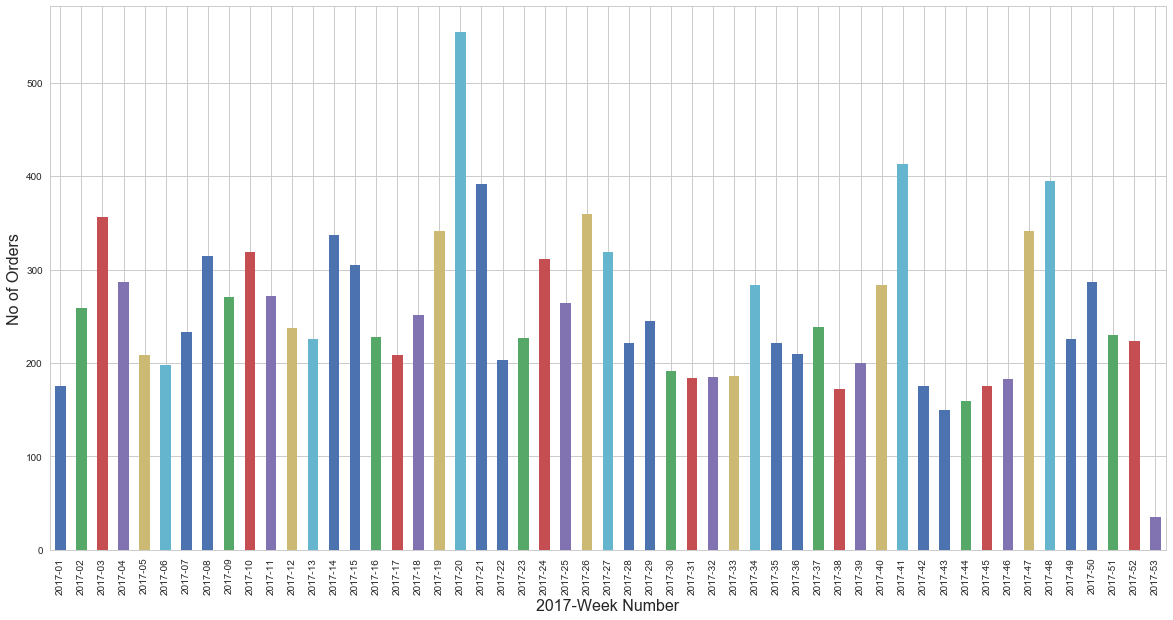

In [182]:
# plotting bar graph
plt.figure(figsize=(20,10))
ax = Orders_every_week.plot.bar()
plt.xlabel("2017-Week Number",fontsize=16)
plt.ylabel("No of Orders",fontsize=16)
plt.show()

### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

In [183]:
mean_for_0 = df.groupby('gender')['value'].mean()[0]
print(mean_for_0)

363.89000591803506


In [184]:
mean_for_1 = df.groupby('gender')['value'].mean()[1]
print(mean_for_1)

350.70836114422


Let's perform a t-test to see if the difference is statiscally significant.<br>
Null Hyphosis: Mean order values of gender 0 and 1 are same. <br>
Alternate hypothesis: Mean order values are different

In [185]:
#computing variance of both categories and then std deviance
var0 = df.groupby('gender')['value'].var(ddof=1)[0]
var1 = df.groupby('gender')['value'].var(ddof=1)[1]
std_dev = np.sqrt((var0 + var1)/2)

In [186]:
#computing t-statistics
N = (df['customer_id'].count())/2
t = (mean_for_0 - mean_for_1)/(std_dev*np.sqrt(2/N))
print("t value:" + str(round(t,4)))

t value:1.976


In [187]:
#degree of freedom
d = 2*N - 2

In [188]:
# p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=d)
# multiply p value with 2 because its a two tail t-test
p_ = round(2*p,4)
print("p value is:" + str(p_))

p value is:0.0482


We got a p value which is less than 0.05. Therefore, we can the reject the null hypothesis. Hence, the mean order value difference for gender 0 and 1 is statistically significant.

### D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

In [189]:
actual = df['gender']
df['predicted_gender'] = df['predicted_gender'].values[:] = 0
predicted = df['predicted_gender']
cm = confusion_matrix(actual, predicted)

In [190]:
print('Confusion matrix:',cm)
print('Accuracy Score :',accuracy_score(actual, predicted))
print(classification_report(actual, predicted))

Confusion matrix: [[6759    0]
 [6712    0]]
Accuracy Score : 0.5017444881597506
             precision    recall  f1-score   support

          0       0.50      1.00      0.67      6759
          1       0.00      0.00      0.00      6712

avg / total       0.25      0.50      0.34     13471



C:\Users\TushaCr7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Accuracy is ~50 percent which can be considred similar to random guessing. From accuracy, we can also conclude that the number of actual 0 and 1 categories are almost same. FN and TN are zero.
Values of recall for both categories are 1 and 0 respectively which means the ability of prediction is biased towards one class.

#### Thank You!